## Visualization of La Palma Earthquake Data

Using the subset of IGN data specific to La Palma. This subset was prepared using `screening.ipynb` and saved to `lapalma.csv`. Updates 30th Nov.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [10]:
df = pd.read_csv('./lapalma_update.csv')
df.head()

,Event,Date,Time,Latitude,Longitude,Depth(km),Intensity,Magnitude,Type Mag,Location
0,es2022jzhhn,2022-05-22,21:10:30,28.6623,-17.9605,21.0,NaN,1.8,4,NW TAZACORTE.ILP
1,es2022jydan,2022-05-22,05:53:06,28.5903,-17.8987,12.0,NaN,1.8,4,SE TAZACORTE.ILP
2,es2022jvzxr,2022-05-21,02:02:53,28.6328,-17.8750,12.0,NaN,1.2,4,S EL PASO.ILP
3,es2022jvsin,2022-05-20,22:13:05,28.6074,-17.8939,4.0,NaN,1.5,4,SW EL PASO.ILP
4,es2022jtqen,2022-05-19,18:51:49,28.6225,-17.9355,2.0,NaN,1.4,4,S TAZACORTE.ILP


In [11]:
df['Depth'] = 'Crustal (<20km)'
df.loc[df['Depth(km)'] >= 20, 'Depth'] = 'Mantle (>20km)'

In [25]:
df['timestamp'] = pd.to_numeric(pd.to_datetime(df['Date'] + ' ' + df['Time']))
df['Datetime'] = (df['Date'] + ' ' + df['Time']).apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')
df.tail()

,Event,Date,Time,Latitude,Longitude,Depth(km),Intensity,Magnitude,Type Mag,Location,Depth,timestamp,Datetime
10886,es2017eunnk,2017-03-10,03:20:26,28.5204,-17.8657,30.0,NaN,1.6,4,NW FUENCALIENTE DE LA PALMA.IL,Mantle (>20km),1489116026000000000,2017-03-10 03:20:26
10887,es2017cpaoh,2017-03-10,00:16:11,28.5008,-17.8863,20.0,NaN,2.1,4,W LOS CANARIOS.ILP,Mantle (>20km),1489104971000000000,2017-03-10 00:16:11
10888,es2017euhlh,2017-03-10,00:16:10,28.5491,-17.8459,27.0,NaN,2.0,4,N FUENCALIENTE DE LA PALMA.ILP,Mantle (>20km),1489104970000000000,2017-03-10 00:16:10
10889,es2017eugju,2017-03-09,23:44:06,28.5346,-17.8349,26.0,NaN,1.6,4,NE FUENCALIENTE DE LA PALMA.IL,Mantle (>20km),1489103046000000000,2017-03-09 23:44:06
10890,1369863,2016-01-31,15:29:42,28.5574,-17.5646,0.0,NaN,2.3,4,ATLÁNTICO-CANARIAS,Crustal (<20km),1454254182000000000,2016-01-31 15:29:42


# Event data since 2016

/var/folders/wq/t23_fvb50gq4b9nw_9pnfcww0000gn/T/ipykernel_34302/1247434618.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtick_labels, rotation=50);


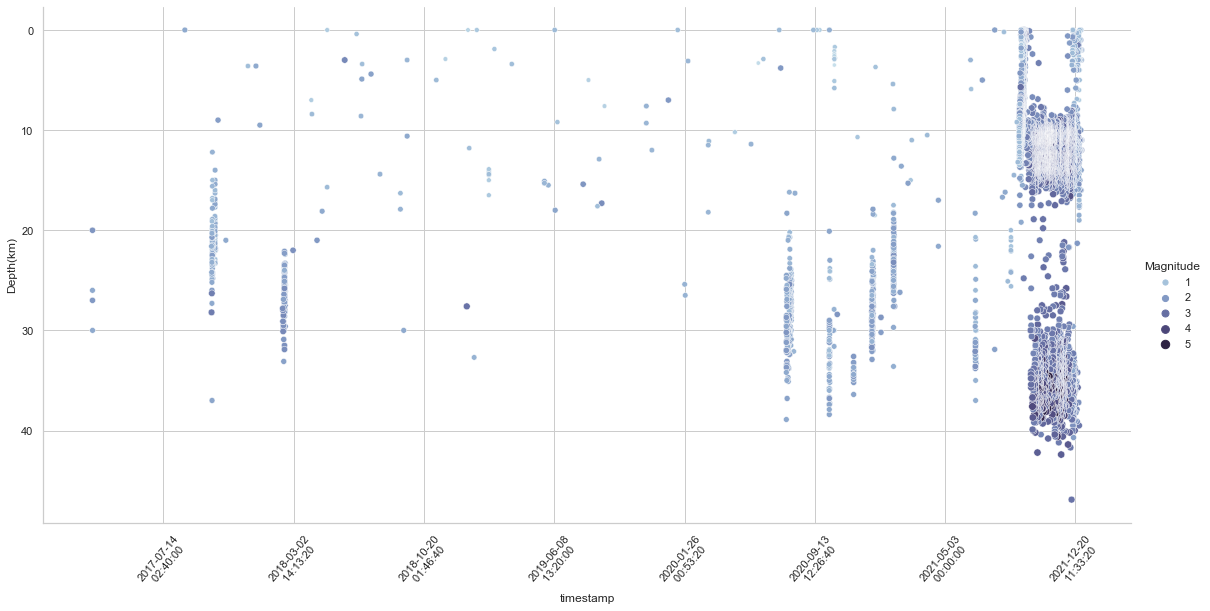

In [26]:
def get_numeric_datetime(dt: str):
    return pd.to_numeric(pd.to_datetime([dt]))[0]

sns.relplot(
    data=df[(df['Date'] < '2022-01-01') & (df['Date'] > '2016-12-31')],
    x="timestamp", y="Depth(km)",
    hue="Magnitude", size="Magnitude", 
    kind="scatter",palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    height=8, aspect=2
)

plt.gca().invert_yaxis()
xticks = plt.gca().get_xticks()
# new_xticks = [get_numeric_datetime('2021-09-11 03:18:42'),
#     get_numeric_datetime('2021-09-19 14:13:00')]
# new_xticks = np.append(new_xticks, xticks[2:-1])
# plt.gca().set_xticks(xticks)

xtick_labels = [pd.to_datetime(tm).strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks]
plt.gca().set_xticklabels(xtick_labels, rotation=50);

# Latest Data on 2021 Eruption

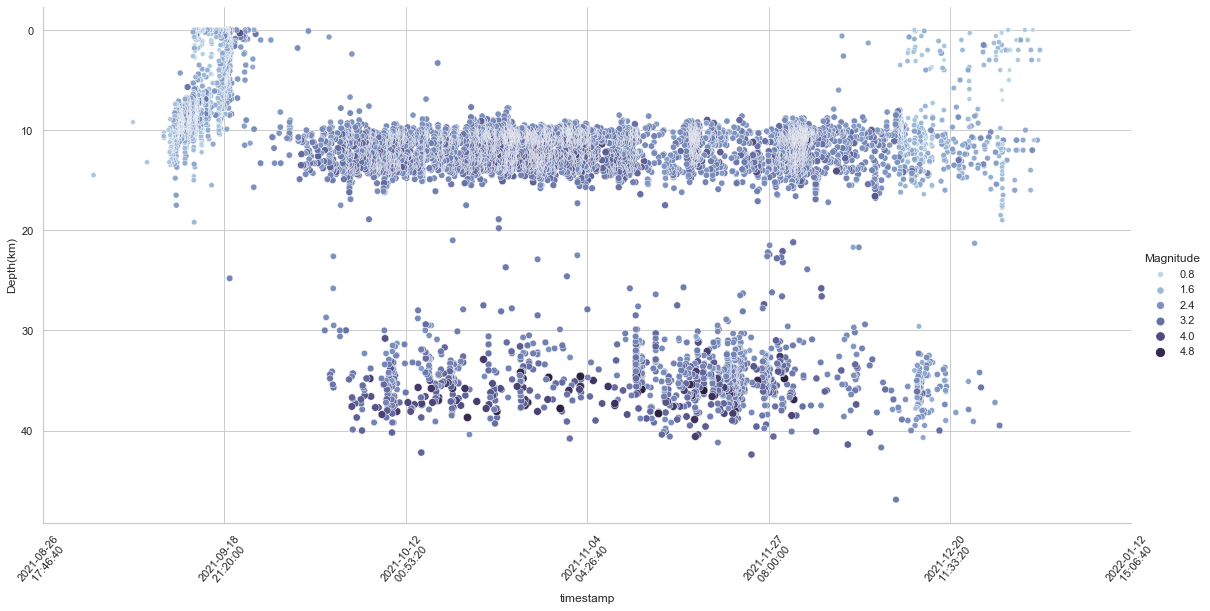

In [27]:
sns.relplot(
    data=df[(df['Date'] < '2022-01-01') & (df['Date'] > '2021-09-01')],
    x="timestamp", y="Depth(km)",
    hue="Magnitude", size="Magnitude", 
    kind="scatter",palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    height=8, aspect=2
)

plt.gca().invert_yaxis()
xticks = plt.gca().get_xticks()
new_xticks = [get_numeric_datetime('2021-09-11 03:18:42'),
    get_numeric_datetime('2021-09-19 14:13:00')]
new_xticks = np.append(new_xticks, xticks[2:-1])
plt.gca().set_xticks(xticks)

xtick_labels = [pd.to_datetime(tm).strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks]
plt.gca().set_xticklabels(xtick_labels, rotation=50);

# Compare

In [28]:
df2 = pd.read_csv('./lapalma.csv')
df2.head()

,Event,Date,UTC time,Local time(*),Latitude,Longitude,Depth(km),Magnitude,Mag. type,Max. int,Region,More Info
0,es2022chvdg,2022-02-02,17:31:41,17:31:41,28.6224,-17.9208,0.0,1.7,mbLg,NaN,SE TAZACORTE.ILP,NaN
1,es2022chfbg,2022-02-02,09:24:25,09:24:25,28.5381,-17.8586,34.0,2.2,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN
2,es2022cffbs,2022-02-01,07:10:21,07:10:21,28.5515,-17.8468,11.0,1.6,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN
3,es2022cfagc,2022-02-01,04:42:34,04:42:34,28.5655,-17.8853,9.0,2.2,mbLg,NaN,NW FUENCALIENTE DE LA PALMA.IL,NaN
4,es2022cewue,2022-02-01,02:57:48,02:57:48,28.5866,-17.9535,8.0,1.8,mbLg,NaN,SW TAZACORTE.ILP,NaN


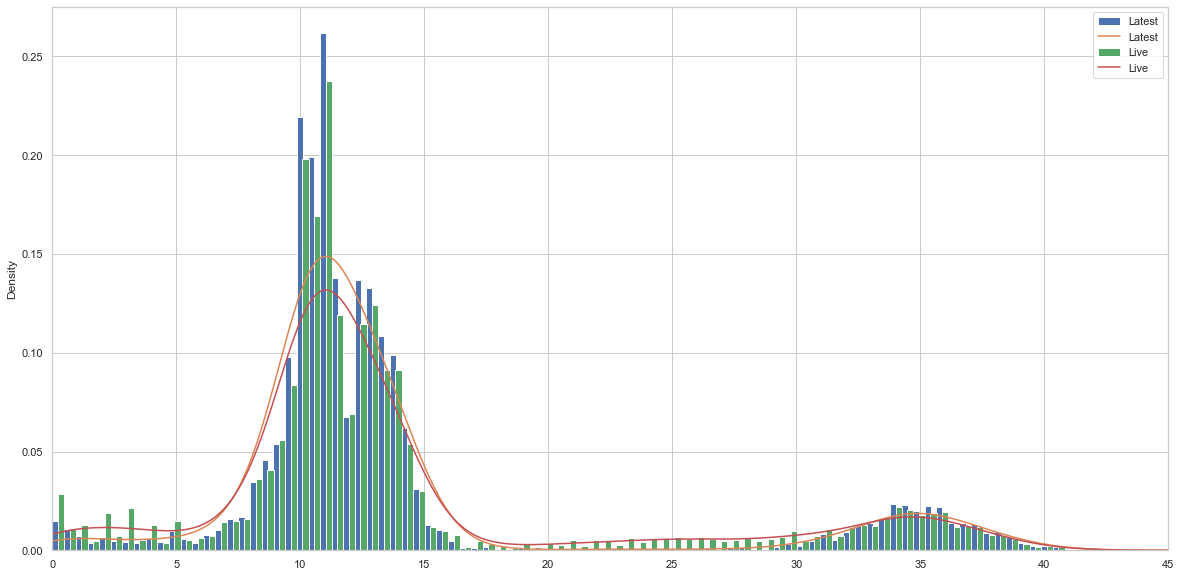

In [29]:
plt.figure(figsize=(20,10))
df2["Depth(km)"].plot.hist(bins=100, density=True, width=0.25, align='mid')
_=df2["Depth(km)"].plot.kde()
df["Depth(km)"].plot.hist(bins=100, density=True, width=0.25, align='right')
_=df["Depth(km)"].plot.kde()
plt.gca().set_xlim((0,45))
plt.legend(labels=['Latest','Latest','Live','Live'])


<BarContainer object of 100 artists>

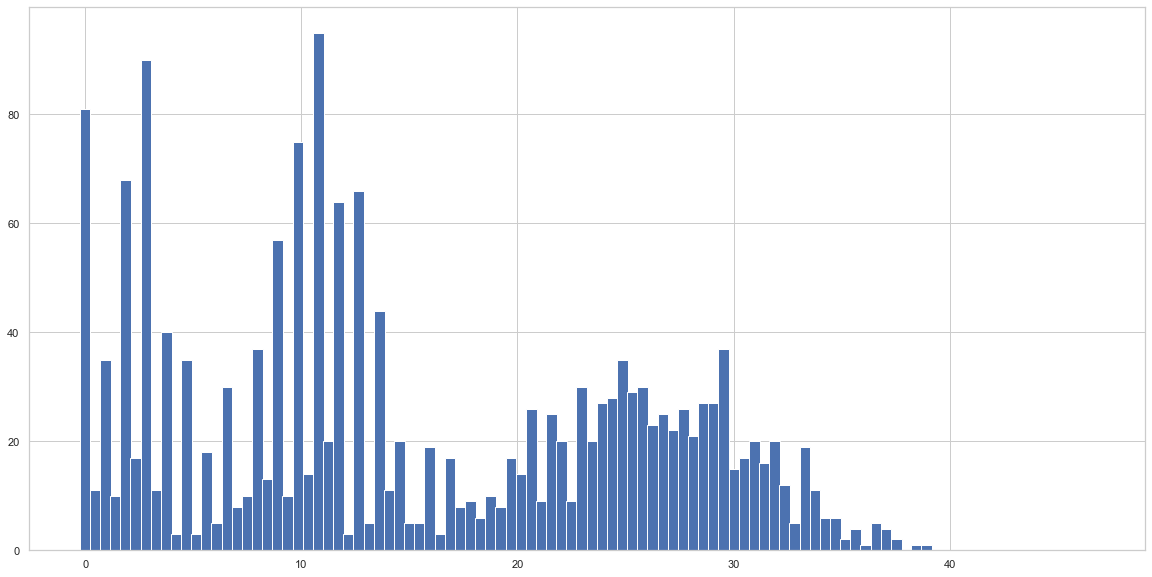

In [30]:
hist_orig, bins = np.histogram(df["Depth(km)"], bins=100)
hist_updated = np.histogram(df2["Depth(km)"],bins=100)[0]

diff = hist_orig - hist_updated                         

plt.figure(figsize=(20,10))
plt.bar(bins[:-1], diff, width=0.5)